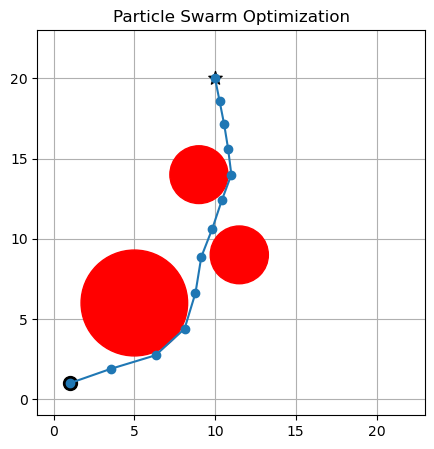

In [6]:
import math
import numpy as np
import matplotlib.pyplot as plt

class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y


class Obstacle_Circle:
    """
    This is a class to implement an obstacle of circular shape.
    Attributes:
        r (int): the radius of the circle.
        C (Point): Center of the circle.
    """

    def __init__(self, r, C):
        self.r = r
        self.C = C

    def inside_circle(self, p):
        """
        The function to check if point p lies inside the circle.
        Parameters:
            p (Point): Point to check.
        Returns:
            boolean: Wheter the point is inside the circle or not.
        """

        return (p.x - self.C.x) ** 2 + (p.y - self.C.y) ** 2 <= self.r**2

    def how_to_exit_y(self, y):
        """
        The function helps the point inside the circe to exit (coordiante y).
        Parameters:
            y (int): Coordinate y of point to check.
        Returns:
            int: y distance between point and center.
        """

        return y - self.C.y

    def how_to_exit_x(self, x):
        """
        The function helps the point inside the circe to exit (coordiante x).
        Parameters:
            x (int): Coordinate x of point to check.
        Returns:
            int: x distance between point and center.
        """

        return x - self.C.x


def plot_circle(circle):
    """
    This function plot one circle.
    Parameters:
        circle (Obstacle_Circle): Circle to plot.
    """

    plt.gca().add_patch(
        plt.Circle(
            (circle.C.x, circle.C.y), circle.r - 0.2, edgecolor="red", facecolor="red"
        )
    )


def plot_graph(best_location):
    """
    This function plot the graph.
    Parameters:
        best_location (List[float, float]): Lists of points to plot.
    """

    plt.close("all")
    plt.figure(figsize=(5, 5))
    plt.grid("on")
    plt.rc("axes", axisbelow=True)
    plt.scatter(END.x, END.y, 100, marker="*", facecolors="k", edgecolors="k")
    plt.scatter(START.x, START.y, 100, marker="o", facecolors="k", edgecolors="k")
    X = [best_location[i][0] for i in range(DIM)]
    X.insert(0, START.x)
    X.append(END.x)
    Y = [best_location[i][1] for i in range(DIM)]
    Y.insert(0, START.y)
    Y.append(END.y)
    plt.plot(X, Y, "o-")
    for i in range(DIM):
        plt.scatter(
            best_location[i][0],
            best_location[i][1],
            25,
            marker=".",
            facecolors="blue",
            edgecolors="face",
        )
        # plt.text(best_location[i][0] + 0.1,best_location[i][1]+0.1,str(i),fontsize=8)
    plt.xlim(-1, 23)
    plt.ylim(-1, 23)
    plt.title("Particle Swarm Optimization")


def random_initialization(swarm_size):
    """
    Random initializations of PSO particles location and velocity.
    Parameters:
        swarm_size (int): How many particles are present.
    Returns:
        List[List[float, float]]: List of starting coordinates of the particles, total number = swarm_size * DIM * 2.
        List[float, float]: List of starting velocity of the particles, total number = swarm_size * DIM * 2.
        List[floats]: Each particle best loss function result.
        List[List[float, float]]: List of best velocity of the particles (there's only the starting in the initialization).
        float: Best loss function result.
        List[float, float]: The best location.
    """

    # set the location and velocity of the particle's
    particles_loc = np.random.rand(swarm_size, DIM, 2) * 20
    particles_vel = np.random.rand(swarm_size, DIM, 2)

    # set the initial particle best location and value
    particles_lowest_loss = [
        loss_function(particles_loc[i, :, :]) for i in range(0, len(particles_loc))
    ]
    particles_best_location = np.copy(particles_loc)

    # set the initial global best location and value
    global_lowest_loss = np.min(particles_lowest_loss)
    global_best_location = particles_loc[np.argmin(particles_lowest_loss)].copy()

    return (
        particles_loc,
        particles_vel,
        particles_lowest_loss,
        particles_best_location,
        global_lowest_loss,
        global_best_location,
    )


def loss_function(x):
    """
    Loss function to find the shortest path.
    Parameters:
        x (List[Point]): List of points representing the path of the agent.
    Returns:
        int: The loss function result
    """

    z = (x[0, 0] - START.x) ** 2 + (x[0, 1] - START.y) ** 2
    for i in range(DIM - 1):
        z = z + ((x[i, 0] - x[i + 1, 0]) ** 2 + (x[i, 1] - x[i + 1, 1]) ** 2)
    z = z + (x[DIM - 1, 0] - END.x) ** 2 + (x[DIM - 1, 1] - END.y) ** 2
    return math.sqrt(z)


def is_valid(circles, p):
    """
    Check if the point p is valid (i.e. doesn't go into obstacles).
    Parameters:
        circles (List[Obstacle_Circle]): The list of obstacles.
        p (Point): The point to check.
    Returns:
        boolean: wheter the point is valid
    """
    to_add = Point(0, 0)
    point_p = Point(p[0], p[1])
    for i in range(len(circles)):
        if circles[i].inside_circle(point_p):
            to_add = Point(
                circles[i].how_to_exit_x(point_p.x) + to_add.x,
                circles[i].how_to_exit_y(point_p.y) + to_add.y,
            )
    return to_add


def particle_swarm_optimization(
    max_iterations, swarm_size, max_vel, step_size, inertia, c1, c2, circles
):
    """
    Implementation of the Particle Swarm Optimization algorithm randomly.
    Parameters:
        max_iterations (int): The maximum number of iterations.
        swarm_size (int): The number of particles.
        max_vel (int): Maximum velocity for a particle.
        step_size (int): The step size for updating each particle (how far a particle travels before its velocity is readjusted).
        inertia (int): The inertia of a particle.
        c1 (int): Factor for the particles local best.
        c2 (int): Factor for the the global best.
        circles (Obstacle_Circle): Obstacle of circular shape.
    Returns:
        boolean: the best path
    """
    (
        particles_loc,
        particles_vel,
        particles_lowest_loss,
        particles_best_location,
        global_lowest_loss,
        global_best_location,
    ) = random_initialization(swarm_size)
    best_location = []
    print_iteration = 1

    for iteration_i in range(max_iterations):
        if iteration_i % 20 == 0:
            #print("%i%%" % int(iteration_i / max_iterations * 100))
            print_iteration += 1
        for particle_i in range(swarm_size):
            dim_i = 0
            while dim_i < DIM:
                # update the velocity vector in a given dimension
                error_particle_best = (
                    particles_best_location[particle_i, dim_i]
                    - particles_loc[particle_i, dim_i]
                )
                error_global_best = (
                    global_best_location[dim_i] - particles_loc[particle_i, dim_i]
                )
                new_vel = (
                    inertia
                    * min(1, (dim_i ** (0.5)) / 4)
                    * particles_vel[particle_i, dim_i]
                    + c1 * np.random.rand(1) * error_particle_best
                    + c2 * np.random.rand(1) * error_global_best
                )

                # bound a particle's velocity to the maximum value
                if new_vel[0] < -max_vel:
                    new_vel[0] = -max_vel
                elif new_vel[0] > max_vel:
                    new_vel[0] = max_vel
                if new_vel[1] < -max_vel:
                    new_vel[1] = -max_vel
                elif new_vel[1] > max_vel:
                    new_vel[1] = max_vel

                # update the particle location and velocity
                particles_loc[particle_i, dim_i] = (
                    particles_loc[particle_i, dim_i] + new_vel[:] * step_size
                )
                particles_vel[particle_i, dim_i] = new_vel[:]

                particle_help = is_valid(circles, particles_loc[particle_i, dim_i, :])
                particles_loc[particle_i, dim_i, 0] += particle_help.x
                particles_loc[particle_i, dim_i, 1] += particle_help.y
                if abs(particle_help.x) > 0.1 or abs(particle_help.y) > 0.1:
                    dim_i -= 1
                dim_i += 1
            # for the new location, check if this is a new local or global best (if it's valid)
            particle_error = loss_function(particles_loc[particle_i, :])
            if particle_error < particles_lowest_loss[particle_i]:  # local best
                particles_lowest_loss[particle_i] = particle_error
                particles_best_location[particle_i, :] = particles_loc[
                    particle_i, :
                ].copy()
            if particle_error < global_lowest_loss:  # global best
                global_lowest_loss = particle_error
                global_best_location = particles_loc[particle_i, :].copy()

        best_location = global_best_location.copy()
    return best_location


DIM = 11
START = Point(1, 1)
END = Point(10, 20)


def main():
    #print("Please wait:")
    best_location = []  # for the plot

    obstacle1 = Obstacle_Circle(2, Point(9, 14))
    obstacle2 = Obstacle_Circle(3.5, Point(5, 6))
    obstacle3 = Obstacle_Circle(2, Point(11.5, 9))
    obstacles = [obstacle1, obstacle2, obstacle3]
    best_location = particle_swarm_optimization(
        max_iterations=1000,
        swarm_size=100,
        max_vel=3,
        step_size=1,
        inertia=0.9,
        c1=2.05,
        c2=2.05,
        circles=obstacles,
    )
    #print("100% completed!")
    plot_graph(best_location)
    for obstacle in obstacles:
        plot_circle(obstacle)
    plt.savefig("results", dpi=300)
    plt.show()


main()